In [22]:
import pandas as pd
import seaborn as sns
import re
import numpy as np
import matplotlib.pyplot as plt
from datetime import timedelta

In [2]:
df = pd.read_csv('ViewingActivity.csv')

In [3]:
df.head(5)

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
0,Manish,2024-07-01 03:11:29,00:20:35,NaN,Maharaj,NaN,Safari MAC (Cadmium),00:42:24,00:42:24,US (United States)
1,Manish,2024-07-01 03:09:30,00:00:05,Autoplayed: user action: None;,Main Character Clip 4: A Family Affair,HOOK,Safari MAC (Cadmium),00:00:05,00:00:05,US (United States)
2,Manish,2024-07-01 03:08:28,00:00:54,Autoplayed: user action: None;,Season 1 Clip 3: The Great Indian Kapil Show,HOOK,Safari MAC (Cadmium),00:00:54,00:00:54,US (United States)
3,Manish,2024-06-28 18:31:01,00:00:14,Autoplayed: user action: None;,Moment of High Emotion Clip: Rebel Moon — Par...,HOOK,Safari MAC (Cadmium),00:00:14,00:00:14,US (United States)
4,Manish,2024-06-27 20:26:28,00:00:19,Autoplayed: user action: None;,Season 1: Plot Clip: MAID,HOOK,Safari MAC (Cadmium),00:00:19,00:00:19,US (United States)


In [4]:
df['Start Time'] = pd.to_datetime(df['Start Time'])
df['Duration'] = pd.to_timedelta(df['Duration'])

In [24]:
import re

def clean_title(title):
    # Convert to lowercase for consistent processing
    title = title.lower()
    
    # Remove season, part, and episode information
    cleaned_title = re.sub(r':\s*(season|part|s)\s*\d+.*', '', title)
    cleaned_title = re.sub(r':\s*(chapter|episode)\s*\d+.*', '', cleaned_title)
    
    # Remove clip information
    cleaned_title = re.sub(r'\s*clip\s*\d+.*', '', cleaned_title)
    
    # Remove anything after a colon if it's followed by a hash or ellipsis
    cleaned_title = re.sub(r':\s*(#|\.\.\.|\u2026).*', '', cleaned_title)
    
    # Remove trailing spaces and punctuation
    cleaned_title = cleaned_title.strip().rstrip(':.,-')
    
    # Capitalize the first letter of each word
    cleaned_title = cleaned_title.title()
    
    return cleaned_title

# Apply the function to the 'Title' column
df['Clean Title'] = df['Title'].apply(clean_title)

# Convert Duration to timedelta
df['Duration'] = pd.to_timedelta(df['Duration'])

# Group by cleaned titles and sum the durations
title_durations = df.groupby('Clean Title')['Duration'].sum().sort_values(ascending=False)

# Convert timedelta to hours
title_durations_hours = title_durations.dt.total_seconds() / 3600

In [25]:
df.head(5)

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country,Clean Title
0,Manish,2024-07-01 03:11:29,0 days 00:20:35,NaN,Maharaj,NaN,Safari MAC (Cadmium),00:42:24,00:42:24,US (United States),Maharaj
1,Manish,2024-07-01 03:09:30,0 days 00:00:05,Autoplayed: user action: None;,Main Character Clip 4: A Family Affair,HOOK,Safari MAC (Cadmium),00:00:05,00:00:05,US (United States),Main Character
2,Manish,2024-07-01 03:08:28,0 days 00:00:54,Autoplayed: user action: None;,Season 1 Clip 3: The Great Indian Kapil Show,HOOK,Safari MAC (Cadmium),00:00:54,00:00:54,US (United States),Season 1
3,Manish,2024-06-28 18:31:01,0 days 00:00:14,Autoplayed: user action: None;,Moment of High Emotion Clip: Rebel Moon — Par...,HOOK,Safari MAC (Cadmium),00:00:14,00:00:14,US (United States),Moment Of High Emotion Clip: Rebel Moon — Par...
4,Manish,2024-06-27 20:26:28,0 days 00:00:19,Autoplayed: user action: None;,Season 1: Plot Clip: MAID,HOOK,Safari MAC (Cadmium),00:00:19,00:00:19,US (United States),Season 1: Plot Clip: Maid


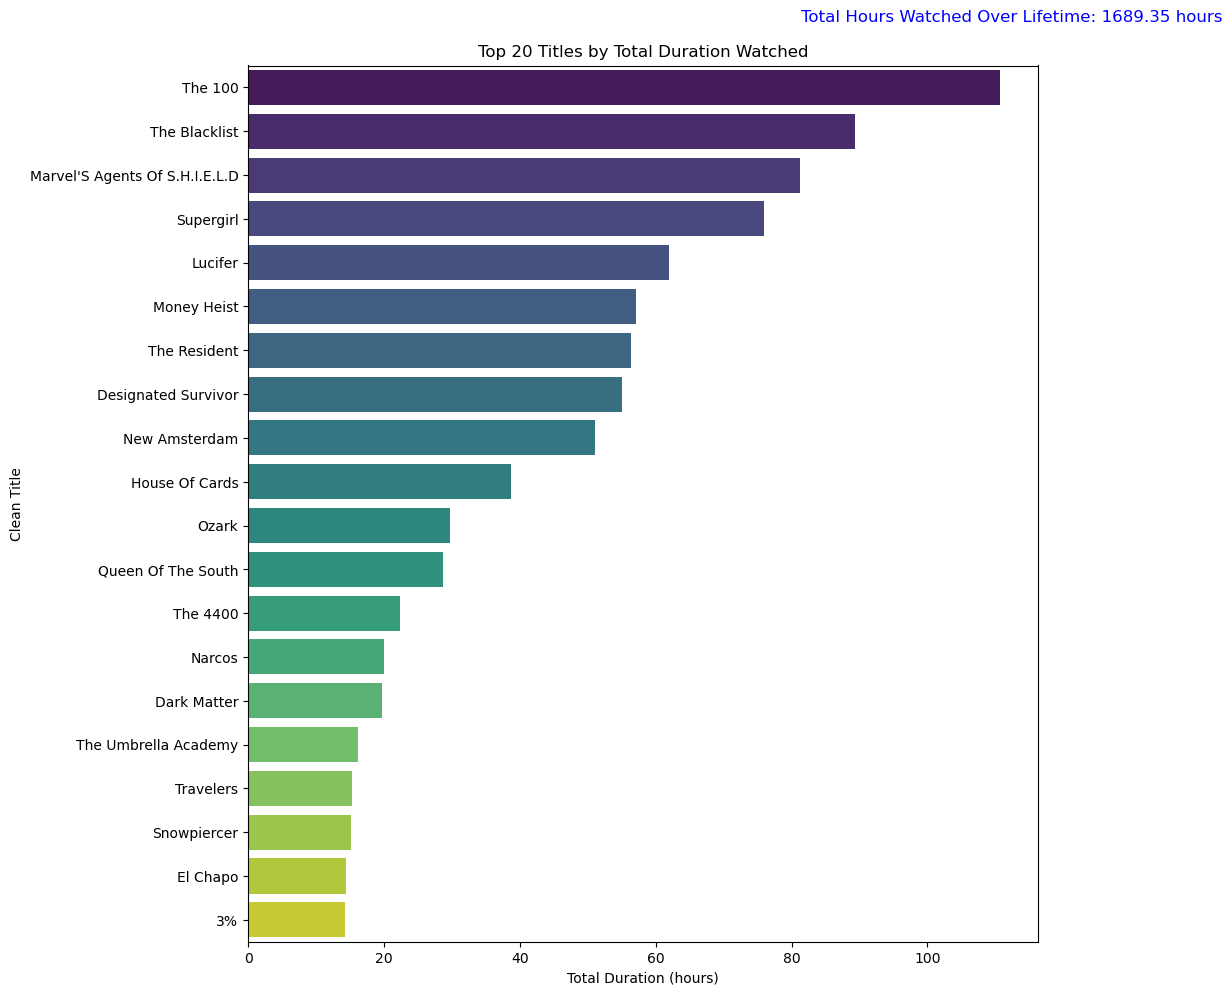

In [35]:
# Calculate total hours watched
total_hours_watched = title_durations_hours.sum()

# Plot the top 30 titles
plt.figure(figsize=(12, 10))
sns.barplot(x=title_durations_hours.head(20).values, y=title_durations_hours.head(20).index, palette='viridis')
plt.title(f'Top 20 Titles by Total Duration Watched')
plt.xlabel('Total Duration (hours)')
plt.ylabel('Clean Title')

# Option 1: Add total hours as text on the plot (optional)
plt.text(0.7, 1.05, f'Total Hours Watched Over Lifetime: {total_hours_watched:.2f} hours', 
         transform=plt.gca().transAxes, fontsize=12, color='blue')

plt.tight_layout()
plt.show()


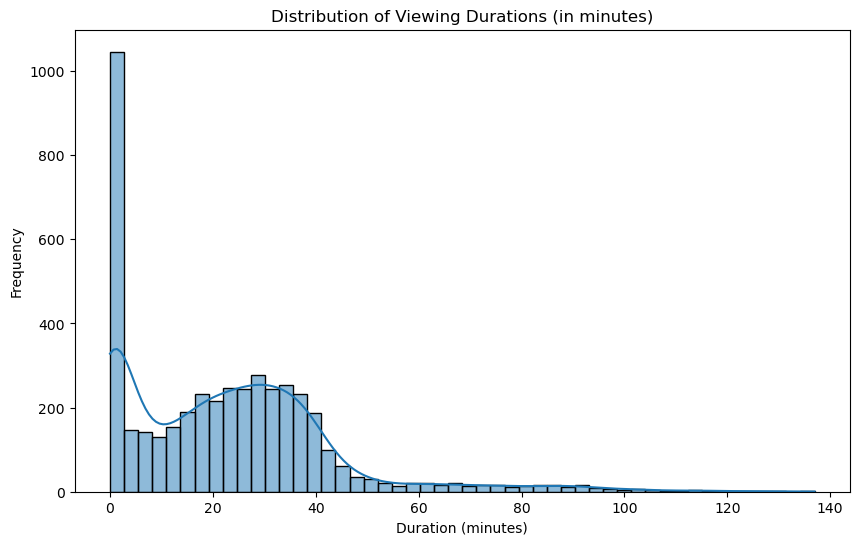

In [36]:
# Plot the distribution of viewing durations
plt.figure(figsize=(10, 6))
sns.histplot(df['Duration'].dt.total_seconds() / 60, bins=50, kde=True)
plt.title('Distribution of Viewing Durations (in minutes)')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.show()

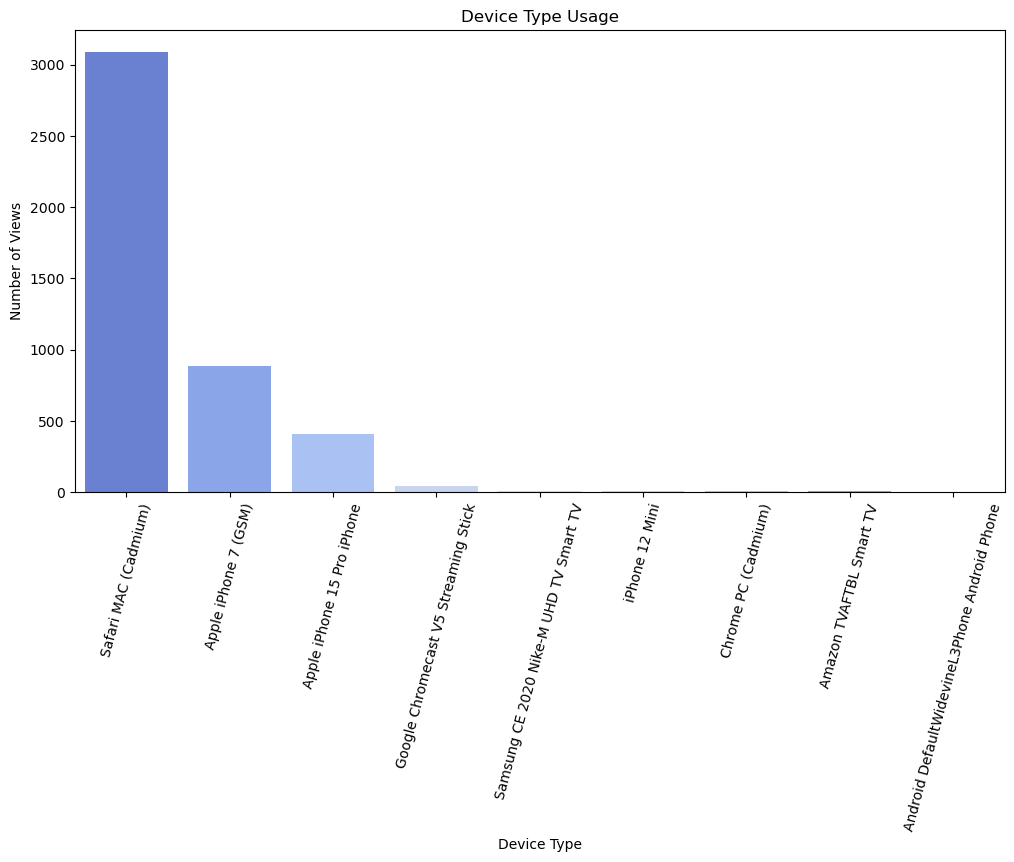

In [37]:
# Plot of Device Type Usage
plt.figure(figsize=(12, 6))
device_counts = df['Device Type'].value_counts()
sns.barplot(x=device_counts.index, y=device_counts.values, palette='coolwarm')
plt.title('Device Type Usage')
plt.xlabel('Device Type')
plt.ylabel('Number of Views')
plt.xticks(rotation=75)
plt.show()

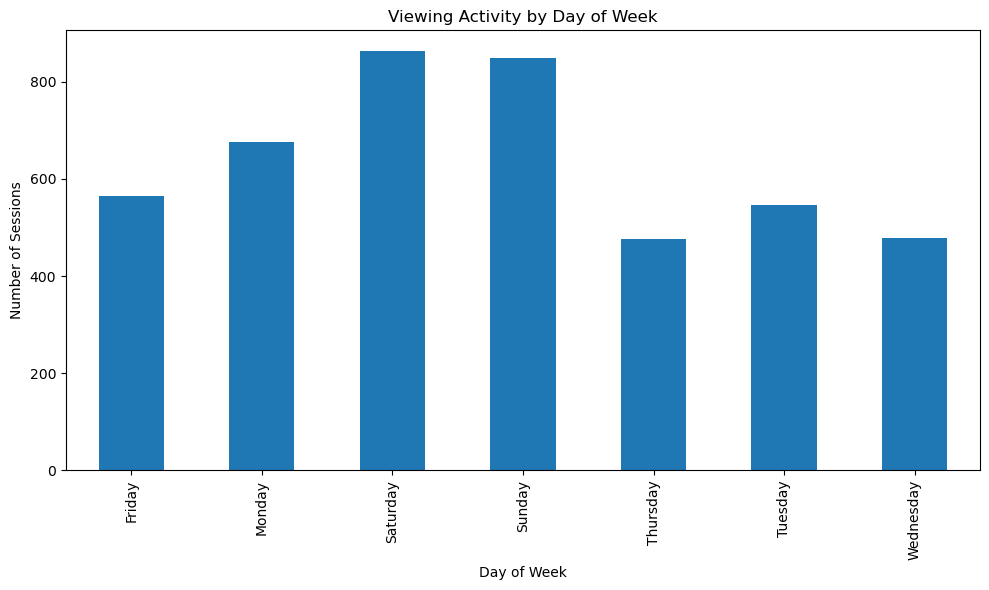

In [41]:
# Viewing activity by day of week
plt.figure(figsize=(10, 6))
df['Day of Week'] = df['Start Time'].dt.day_name()
df['Day of Week'].value_counts().sort_index().plot(kind='bar')
plt.title('Viewing Activity by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Sessions')
plt.tight_layout()
plt.show()

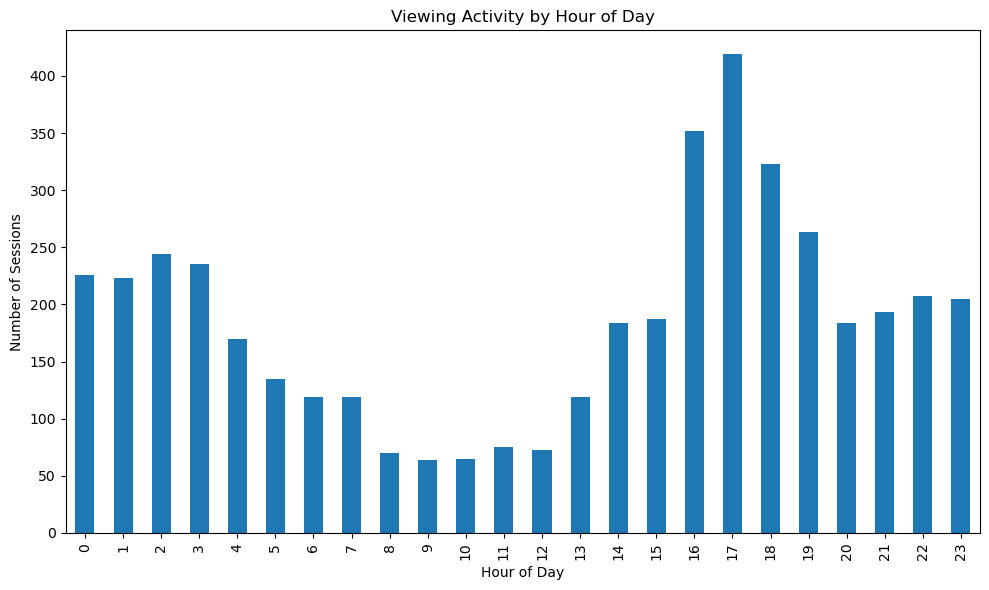

In [42]:
# Viewing activity by hour of day
plt.figure(figsize=(10, 6))
df['Hour of Day'] = df['Start Time'].dt.hour
df['Hour of Day'].value_counts().sort_index().plot(kind='bar')
plt.title('Viewing Activity by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Sessions')
plt.tight_layout()
plt.show()

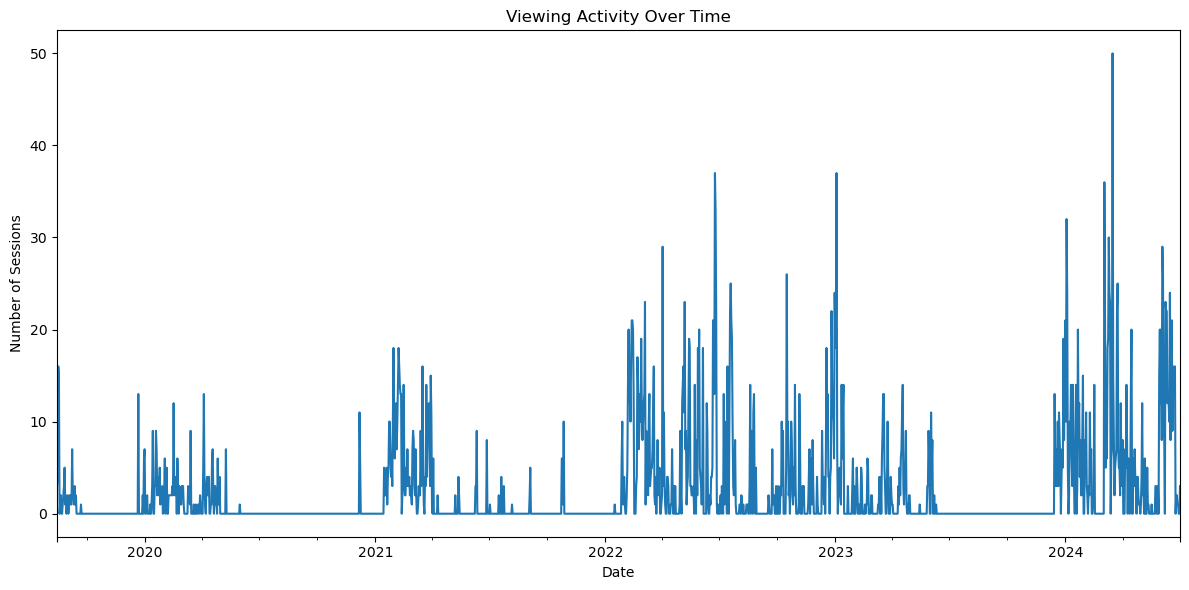

In [43]:
# Viewing activity over time
plt.figure(figsize=(12, 6))
df.set_index('Start Time').resample('D')['Duration'].count().plot()
plt.title('Viewing Activity Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Sessions')
plt.tight_layout()
plt.show()

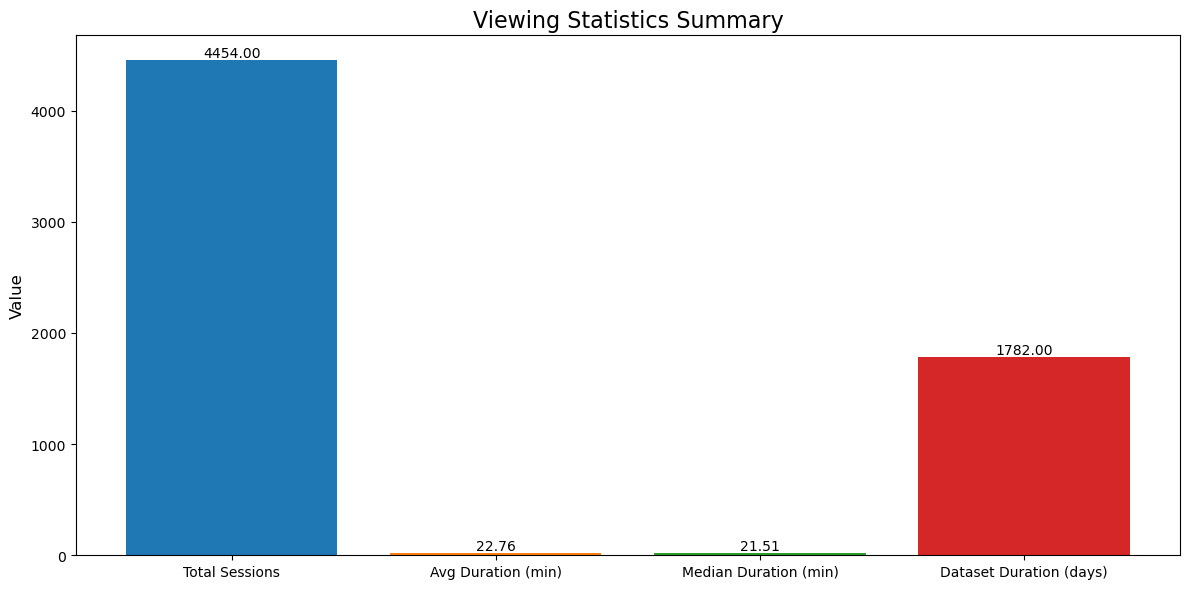

In [46]:
# Calculate statistics
total_sessions = len(df)
avg_duration = df['Duration'].mean()
median_duration = df['Duration'].median()
date_range_start = df['Start Time'].min()
date_range_end = df['Start Time'].max()
total_days = (date_range_end - date_range_start).days + 1

# Prepare data for plotting
stats = {
    'Total Sessions': total_sessions,
    'Avg Duration (min)': avg_duration.total_seconds() / 60,
    'Median Duration (min)': median_duration.total_seconds() / 60,
    'Dataset Duration (days)': total_days
}

# Create bar chart
plt.figure(figsize=(12, 6))
bars = plt.bar(stats.keys(), stats.values(), color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])

# Customize the chart
plt.title('Viewing Statistics Summary', fontsize=16)
plt.ylabel('Value', fontsize=12)
plt.xticks(rotation=0, ha='center')

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2f}',
             ha='center', va='bottom')

# Improve layout
plt.tight_layout()

# Show the plot
plt.show()


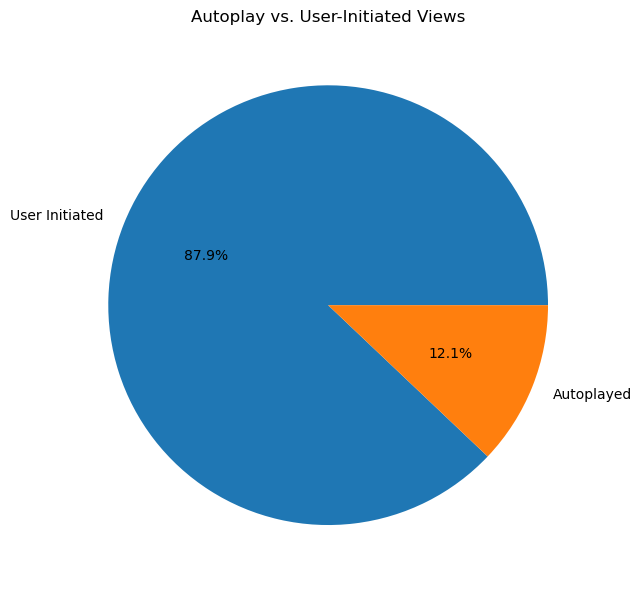

In [47]:
# Autoplay vs. user-initiated views
df['Autoplay'] = df['Attributes'].str.contains('Autoplayed', na=False)
autoplay_counts = df['Autoplay'].value_counts()
plt.figure(figsize=(8, 6))
autoplay_counts.plot(kind='pie', autopct='%1.1f%%', labels=['User Initiated', 'Autoplayed'])
plt.title('Autoplay vs. User-Initiated Views')
plt.ylabel('')
plt.tight_layout()
plt.show()